In [181]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import json

In [171]:
api_key = ''
api_service_name = 'youtube'
api_version = 'v3' 

youtube = build(api_service_name, api_version, developerKey=api_key)

channel_ids = ['UCCezIgC97PvUuR4_gbFUs5g', # Corey Shafer
               'UCcIXc5mJsHVYTZR1maL5l9w', # DeepLearningAI
               'UCr8O8l5cCX85Oem1d18EezQ', # DanielBourke
               'UCfzlCWGWYyIQ0aLC5w48gBQ', # Sentdex
               'UCtYLUTtgS3k1Fg4y5tAhLbw', # StatQuest
               'UCYO_jab_esuFRV4b17AJtAw' # 3Blue1Brown
               ]


In [172]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'])
        all_data.append(data)

    return all_data

In [173]:
data = get_channel_stats(youtube, channel_ids)

In [174]:
len(data)

6

In [175]:
yt_data = pd.DataFrame(data)

In [176]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  6 non-null      object
 1   Subscribers   6 non-null      object
 2   Views         6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


In [177]:
yt_data['Subscribers'] = pd.to_numeric(yt_data['Subscribers'])
yt_data['Views'] = pd.to_numeric(yt_data['Views'])

In [178]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  6 non-null      object
 1   Subscribers   6 non-null      int64 
 2   Views         6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


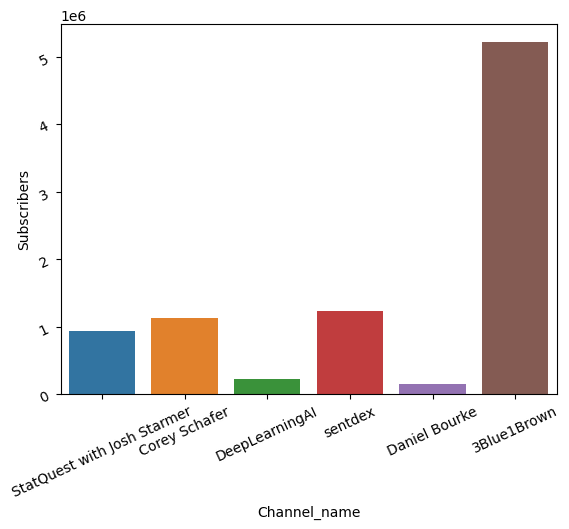

In [183]:
ax = sns.barplot(x = 'Channel_name', y = 'Subscribers', data = yt_data)
ax.tick_params(labelrotation = 25)